# Advanced Fibrosis Diagnosis with Neural Networks

In this activity, you are going to use a real dataset to predict whether a patient has advanced fibrosis based on measurements such as age, gender, and BMI. The dataset consists of information for 1,385 patients who underwent treatment dosages for hepatitis C. For each patient, 28 different attributes are available, as well as a class label, which can only take two values: 
- 1, indicating advanced fibrosis, and 
- 0, indicating no indication of advanced fibrosis. 

This is a binary/two-class classification problem with an input dimension equal to 28.

In this activity, you will implement different deep neural network architectures to perform this classification. Plot the trends in the training error rates and test error rates and determine how many epochs the final classifier needs to be trained for.

### 1. Import all the necessary dependencies. Load the dataset from the data subfolder of the Chapter03 folder from GitHub:

In [118]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from tensorflow import random
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
X = pd.read_csv('../data/HCV_feats.csv')
y = pd.read_csv('../data/HCV_target.csv')

### 2. Print the number of examples in the dataset, the number of features available, and the possible values for the class labels.

In [120]:
X

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading
0,56,1,35,2,1,1,1,2,2,2,...,81,5,5,5,655330,634536,288194,5,5,13
1,46,1,29,1,2,2,1,2,2,1,...,113,57,123,44,40620,538635,637056,336804,31085,4
2,57,1,33,2,2,2,2,1,1,1,...,116,5,5,5,571148,661346,5,735945,558829,4
3,49,2,33,1,2,1,2,1,2,1,...,88,48,77,33,1041941,449939,585688,744463,582301,10
4,59,1,32,1,1,2,1,2,2,2,...,120,94,90,30,660410,738756,3731527,338946,242861,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44,1,29,1,2,2,2,1,1,1,...,127,63,44,45,387795,55938,5,5,5,15
1381,55,1,34,1,2,2,1,1,1,1,...,108,97,64,41,481378,152961,393339,73574,236273,10
1382,42,1,26,2,2,1,1,1,2,1,...,116,87,39,24,612664,572756,806109,343719,160457,6
1383,52,1,29,2,1,1,2,2,2,1,...,47,48,81,43,139872,76161,515730,2460,696074,15


In [121]:
y

,AdvancedFibrosis
0,0
1,0
2,1
3,1
4,0
...,...
1380,1
1381,0
1382,0
1383,1


In [122]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               1385 non-null   int64  
 1   Gender                            1385 non-null   int64  
 2   BMI                               1385 non-null   int64  
 3   Fever                             1385 non-null   int64  
 4   Nausea/Vomting                    1385 non-null   int64  
 5   Headache                          1385 non-null   int64  
 6   Diarrhea                          1385 non-null   int64  
 7   Fatigue & generalized bone ache   1385 non-null   int64  
 8   Jaundice                          1385 non-null   int64  
 9   Epigastric pain                   1385 non-null   int64  
 10  WBC                               1385 non-null   int64  
 11  RBC                               1385 non-null   float64
 12  HGB   

In [123]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   AdvancedFibrosis  1385 non-null   int64
dtypes: int64(1)
memory usage: 10.9 KB


In [124]:
print(X.shape)
print(y.shape)

(1385, 28)
(1385, 1)


In [125]:
y.AdvancedFibrosis.value_counts()

1    717
0    668
Name: AdvancedFibrosis, dtype: int64

([<matplotlib.patches.Wedge at 0x209f944e828>,
 [Text(-0.061099152695651957, 1.0983018226060965, '1'),
  Text(0.06109915269565158, -1.0983018226060965, '0')])

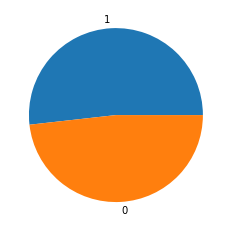

In [126]:
counts = y.AdvancedFibrosis.value_counts()
plt.pie(counts, labels=counts.index)

### 3. Scale the data using the StandardScalar function from sklearn.preprocessing and split the dataset into the training set and test set with an 80:20 ratio. Then, print the number of examples in each set after splitting.

In [127]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading
0,1.102814,-0.979276,1.568525,0.969420,-1.005067,-0.992089,-1.005067,1.002168,0.997836,0.992089,...,-0.103412,-2.960181,-2.999471,-4.021808,0.181960,0.092882,-0.001962,-1.087692,-1.088823,0.805050
1,-0.036355,-0.979276,0.096039,-1.031544,0.994959,1.007974,-1.005067,1.002168,0.997836,-1.007974,...,1.118124,-0.989700,1.501857,1.493666,-1.555454,-0.171903,1.221053,0.185824,-0.972681,-1.432396
2,1.216730,-0.979276,1.077696,0.969420,0.994959,1.007974,0.994959,-0.997836,-1.002168,-1.007974,...,1.232643,-2.960181,-2.999471,-4.021808,-0.055972,0.166905,-1.012273,1.695069,0.999427,-1.432396
3,0.305396,1.021163,1.077696,-1.031544,0.994959,-0.992089,0.994959,-0.997836,0.997836,-1.007974,...,0.163799,-1.330745,-0.252898,-0.061981,1.274675,-0.416795,1.040971,1.727277,1.087139,0.059234
4,1.444564,-0.979276,0.832282,-1.031544,-1.005067,1.007974,-1.005067,1.002168,0.997836,0.992089,...,1.385335,0.412373,0.243011,-0.486248,0.196318,0.380636,12.069419,0.193923,-0.181303,0.307840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,-0.264188,-0.979276,0.096039,-1.031544,0.994959,1.007974,0.994959,-0.997836,-1.002168,-1.007974,...,1.652546,-0.762337,-1.511744,1.635088,-0.574200,-1.504642,-1.012273,-1.087692,-1.088823,1.302260
1381,0.988897,-0.979276,1.323110,-1.031544,0.994959,1.007974,-1.005067,-0.997836,-1.002168,-1.007974,...,0.927259,0.526054,-0.748807,1.069398,-0.309697,-1.236759,0.366648,-0.809510,-0.205921,0.059234
1382,-0.492022,-0.979276,-0.640203,0.969420,0.994959,-0.992089,-1.005067,-0.997836,0.997836,-1.007974,...,1.232643,0.147116,-1.702479,-1.334782,0.061369,-0.077694,1.813706,0.211971,-0.489235,-0.935186
1383,0.647146,-0.979276,0.096039,0.969420,-1.005067,-0.992089,0.994959,1.002168,0.997836,-1.007974,...,-1.401293,-1.330745,-0.100311,1.352243,-1.274928,-1.448806,0.795717,-1.078409,1.512293,1.302260


In [128]:
seed = 1

In [129]:
np.random.seed(seed)
random.set_seed(seed)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=seed)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1108, 28) (277, 28)
(1108, 1) (277, 1)


### 4. Implement a shallow neural network with one hidden layer of size 3 and a tanh activation function to perform the classification. Compile the model with the following values for the hyperparameters:

In [130]:
np.random.seed(seed)
random.set_seed(seed)

model1 = Sequential()

input_dim = X_train.shape[1]
model1.add(Dense(3, input_dim=input_dim, activation='tanh'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(
    loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 3)                 87        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 4         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


### 5. Fit the model with the following hyperparameters and store the values for training error rate and test error rate during the training process: batch_size = 20, epochs = 100, validation_split=0.1, and shuffle=False.

In [131]:
history1 = model1.fit(
    x=X_train,
    y=y_train,
    batch_size=20,
    epochs=100,
    validation_split=0.1,
    shuffle=False
)

Train on 997 samples, validate on 111 samples
Epoch 1/100
997/997 [==============================] - 0s 193us/step - loss: 0.7972 - accuracy: 0.4714 - val_loss: 0.7460 - val_accuracy: 0.5676
Epoch 2/100
997/997 [==============================] - 0s 93us/step - loss: 0.7795 - accuracy: 0.4764 - val_loss: 0.7343 - val_accuracy: 0.5676
Epoch 3/100
997/997 [==============================] - 0s 99us/step - loss: 0.7653 - accuracy: 0.4794 - val_loss: 0.7248 - val_accuracy: 0.5676
Epoch 4/100
997/997 [==============================] - 0s 97us/step - loss: 0.7536 - accuracy: 0.4875 - val_loss: 0.7169 - val_accuracy: 0.5766
Epoch 5/100
997/997 [==============================] - 0s 99us/step - loss: 0.7441 - accuracy: 0.4945 - val_loss: 0.7104 - val_accuracy: 0.5766
Epoch 6/100
997/997 [==============================] - 0s 94us/step - loss: 0.7363 - accuracy: 0.5035 - val_loss: 0.7050 - val_accuracy: 0.5676
Epoch 7/100
997/997 [==============================] - 0s 99us/step - loss: 0.7297 - accu

In [132]:
#Evaluate model
test_loss, test_acc = model1.evaluate(X_test, y_test['AdvancedFibrosis'])
print(f'The loss on the test set is {test_loss:.4f} and the accuracy is {test_acc*100:.3f}%')

277/277 [==============================] - 0s 58us/step
The loss on the test set is 0.7101 and the accuracy is 49.458%


In [133]:
# list all data in history
print(history1.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


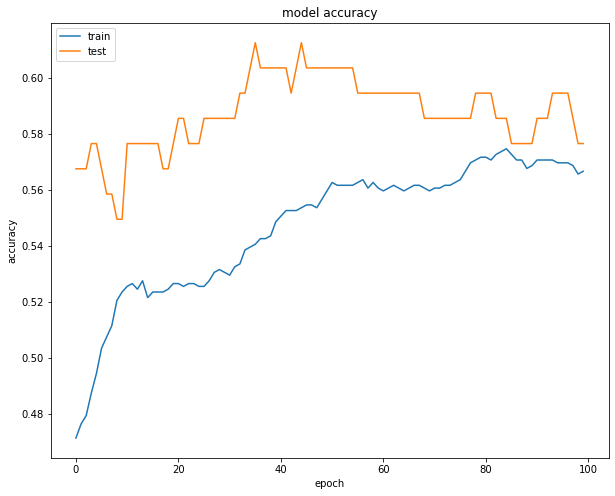

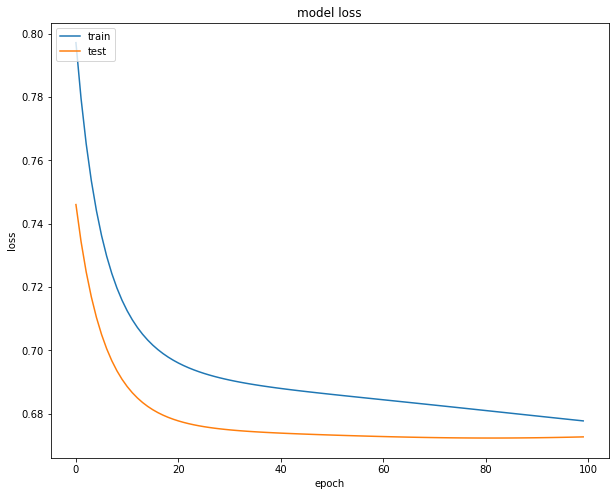

In [134]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 7. Repeat steps 4 and 5 for a deep neural network with two hidden layers (the first layer of size 4 and the second layer of size 3) and a 'tanh' activation function for both layers in order to perform the classification.

In [135]:
np.random.seed(seed)
random.set_seed(seed)

model2 = Sequential()

input_dim = X_train.shape[1]
model2.add(Dense(4, input_dim=input_dim, activation='tanh'))
model2.add(Dense(3, activation='tanh'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(
    loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

model2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 4)                 116       
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 15        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 4         
Total params: 135
Trainable params: 135
Non-trainable params: 0
_________________________________________________________________


In [136]:
history2 = model2.fit(
    x=X_train,
    y=y_train,
    batch_size=20,
    epochs=100,
    validation_split=0.1,
    shuffle=False
)

Train on 997 samples, validate on 111 samples
Epoch 1/100
997/997 [==============================] - 0s 277us/step - loss: 0.7379 - accuracy: 0.4814 - val_loss: 0.7171 - val_accuracy: 0.5315
Epoch 2/100
997/997 [==============================] - 0s 118us/step - loss: 0.7312 - accuracy: 0.4905 - val_loss: 0.7124 - val_accuracy: 0.5315
Epoch 3/100
997/997 [==============================] - 0s 101us/step - loss: 0.7258 - accuracy: 0.4965 - val_loss: 0.7086 - val_accuracy: 0.5315
Epoch 4/100
900/997 [==========================>...] - ETA: 0s - loss: 0.7196 - accuracy: 0.49997/997 [==============================] - 0s 135us/step - loss: 0.7214 - accuracy: 0.4935 - val_loss: 0.7056 - val_accuracy: 0.5315
Epoch 5/100
997/997 [==============================] - 0s 145us/step - loss: 0.7176 - accuracy: 0.5035 - val_loss: 0.7031 - val_accuracy: 0.5405
Epoch 6/100
997/997 [==============================] - 0s 159us/step - loss: 0.7145 - accuracy: 0.5065 - val_loss: 0.7010 - val_accuracy: 0.5405
Ep

In [137]:
#Evaluate model
test_loss, test_acc = model2.evaluate(X_test, y_test['AdvancedFibrosis'])
print(f'The loss on the test set is {test_loss:.4f} and the accuracy is {test_acc*100:.3f}%')

277/277 [==============================] - 0s 51us/step
The loss on the test set is 0.6968 and the accuracy is 51.986%


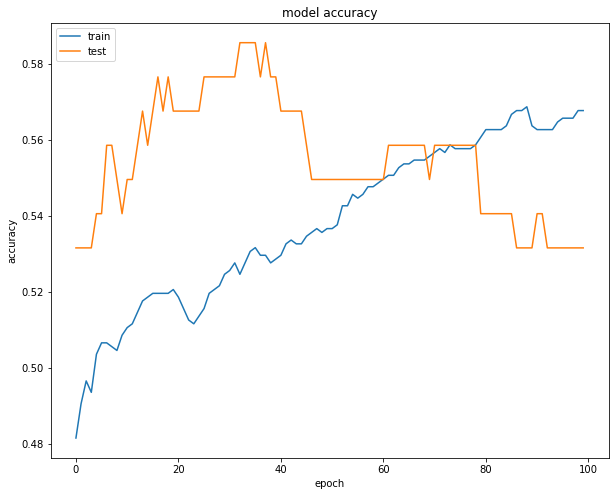

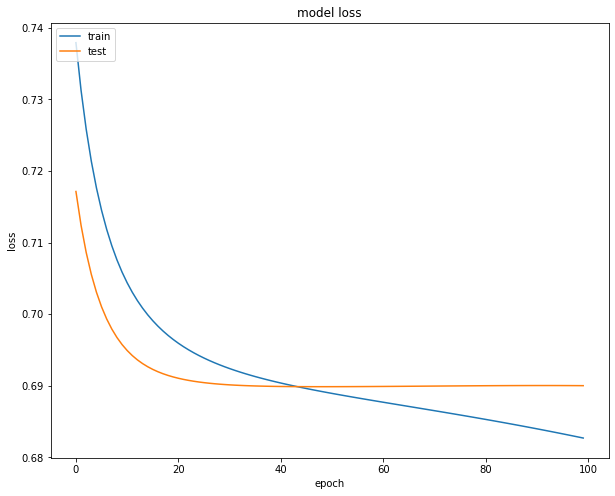

In [138]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Please note that both models were able to achieve better accuracy on the training or validation set compared to the test set, and the training error rate kept decreasing when it was trained for a significant number of epochs. However, the validation error rate decreased during training to a certain value, and after that, it started increasing, which is indicative of overfitting to the training data. The maximum validation accuracy corresponds to the point on the plots where the validation loss is at its lowest and is truly representative of how well the model will perform on independent examples later.

It can be seen from the results that the model with one hidden layer is able to reach a lower validation and test error rate in comparison to the two-layer models. From this, we may conclude that this model is the best match for this particular problem. The model with one hidden layer shows a large amount of bias, indicated by the large gap between the training and validation errors, and both were still decreasing, indicating that the model can be trained for more epochs. Lastly, it can be determined from the plots that we should stop training around the region where the validation error rate starts increasing to prevent the model from overfitting to the data points.